# Mini Project: Logistic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


First, let's import all the libraries we'll be using.

In [2]:
%pip install requirements.txt

%pip install seaborn pandas pyarrow

%pip install pandas pyarrow sklearn

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
HINT: You are attempting to install a package literally named "requirements.txt" (which cannot exist). Consider using the '-r' flag to install the packages listed in requirements.txt
ERROR: No matching distribution found for requirements.txt
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [5]:
# Load data and split into feature and target variables

# Load dataset
cancer = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Features and target variables
X = df.drop(columns=['target'])
y = df['target']

print("Shape of dataset:", df.shape)



Shape of dataset: (569, 31)


In [11]:
# View first 5 rows of the data
df.head(500)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,...,28.48,103.90,783.6,0.1216,0.1388,0.1700,0.1017,0.2369,0.06599,1
496,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.1407,0.3230,0.10330,1
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,24.34,92.82,607.3,0.1276,0.2506,0.2028,0.1053,0.3035,0.07661,1
498,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,...,22.88,146.40,1600.0,0.1412,0.3089,0.3533,0.1663,0.2510,0.09445,0


In [12]:
# How frequently does the positive target occur?
# Count values
counts = df['target'].value_counts(normalize=True) * 100
#In Pandas, Series.value_counts() returns the frequency of unique values in a column.
#When you add normalize=True, Pandas divides each count by the total number of rows, returning relative frequencies (proportions) instead of raw counts.
print("Target distribution (%):\n", counts)

# Positive target frequency
positive_freq = counts[1]
print(f"Positive target (benign) occurs {positive_freq:.2f}% of the time")
#The part :.2f is an f-string format specifier that tells Python:
#. → we want to control decimal places.
#2f → format as a floating-point number with 2 digits after the decimal.


Target distribution (%):
 target
1    62.741652
0    37.258348
Name: proportion, dtype: float64
Positive target (benign) occurs 62.74% of the time


In [6]:
# Generate summary statistics for the data
# Summary statistics
print(df.describe())

# Distribution of target (0 = malignant, 1 = benign)
print(df['target'].value_counts())


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

/var/folders/v4/6jx7p5p972g59nvc4vn2pzb40000gn/T/ipykernel_3073/2648361329.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  few_features['target'] = df['target']


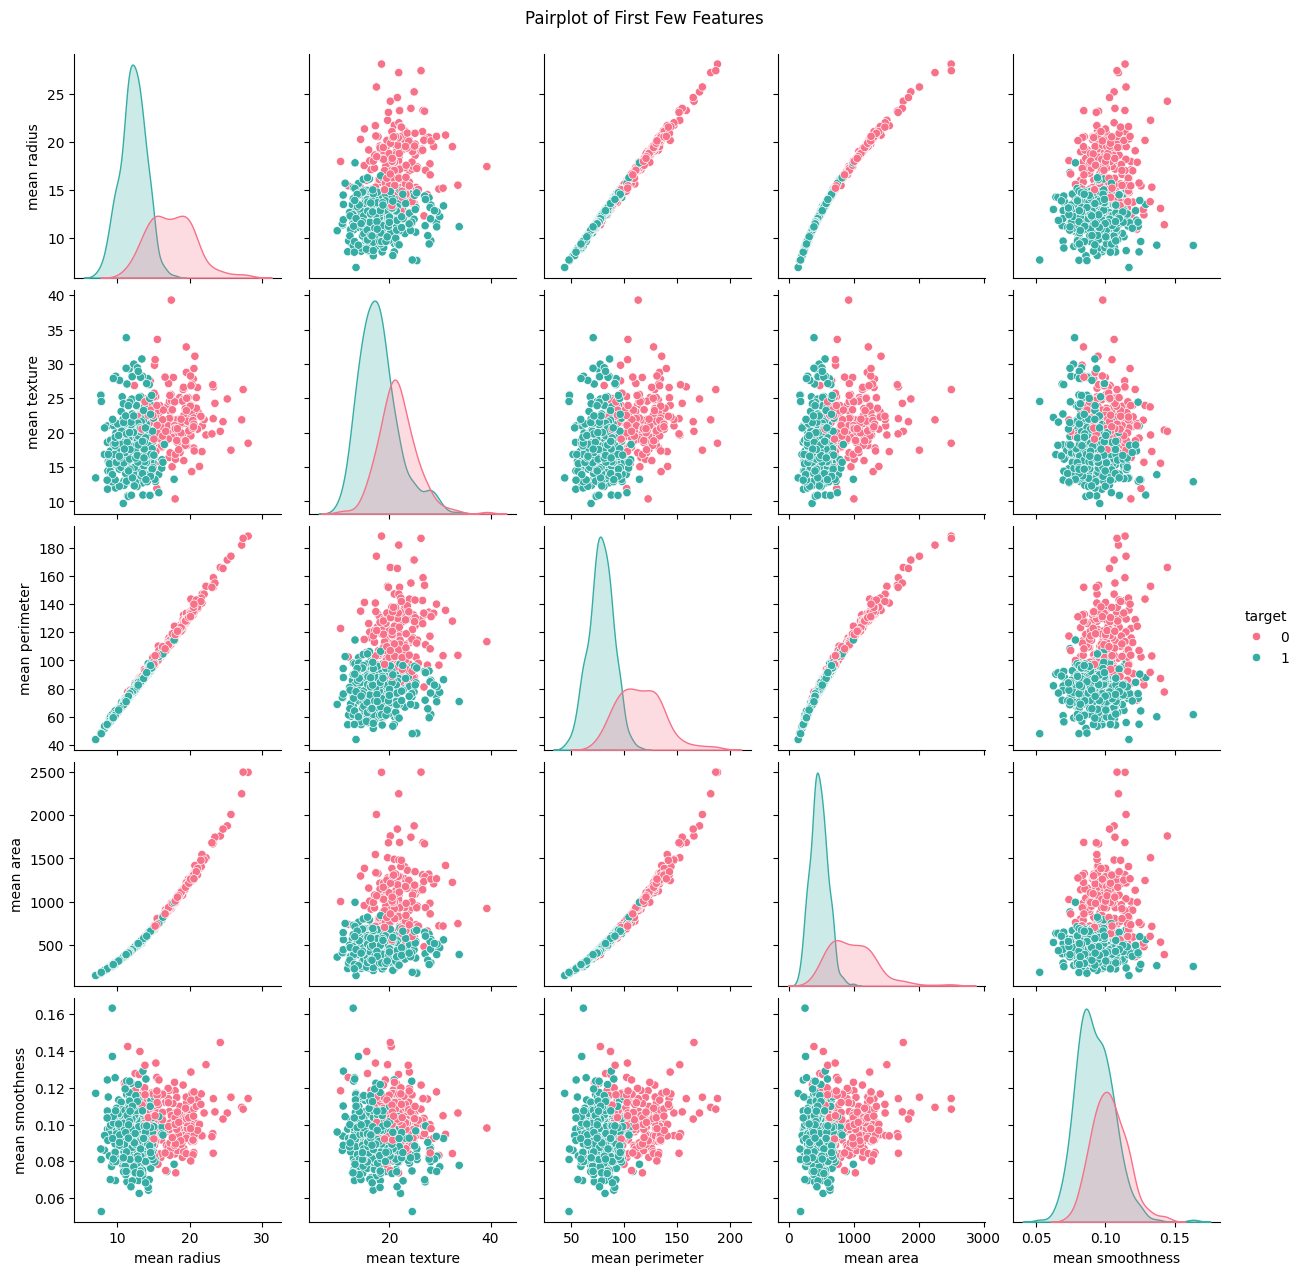

In [7]:
# Create a pairplot for the first few features

# Select first few features + target
#iloc = integer-location based indexing.
#It lets you select rows/columns in a DataFrame using numeric positions (like Python lists),
#  rather than labels.
#df.iloc[row_selection, column_selection]
#row_selection: integers, slices, or lists for rows.
#column_selection: integers, slices, or lists for columns.

few_features = df.iloc[:, :5]   # first 5 features
few_features['target'] = df['target']

# Pairplot
#“Make a scatterplot matrix for the first few features, color the points by 
# target (benign/malignant), show smooth density curves on the diagonal instead of histograms, 
# and use the husl color scheme.”

#hue --> Meaning: Tells Seaborn to color-code the plots based on the target column.

#diag_kind="kde"

#Controls what is drawn on the diagonal (the univariate plots).
#Options:
#"hist" → histogram (bars)
#"kde" → kernel density estimate (smooth curve showing probability density)
#So here, instead of histograms, you’ll see smooth density curves of each feature’s distribution.


#palette --> Defines the color scheme.
#"husl" is a Seaborn color palette designed to be evenly spaced and bright across the hue spectrum.
#Other common palettes: "Set2", "coolwarm", "viridis", "pastel", etc.

sns.pairplot(few_features, hue='target', diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of First Few Features", y=1.02)
plt.show()


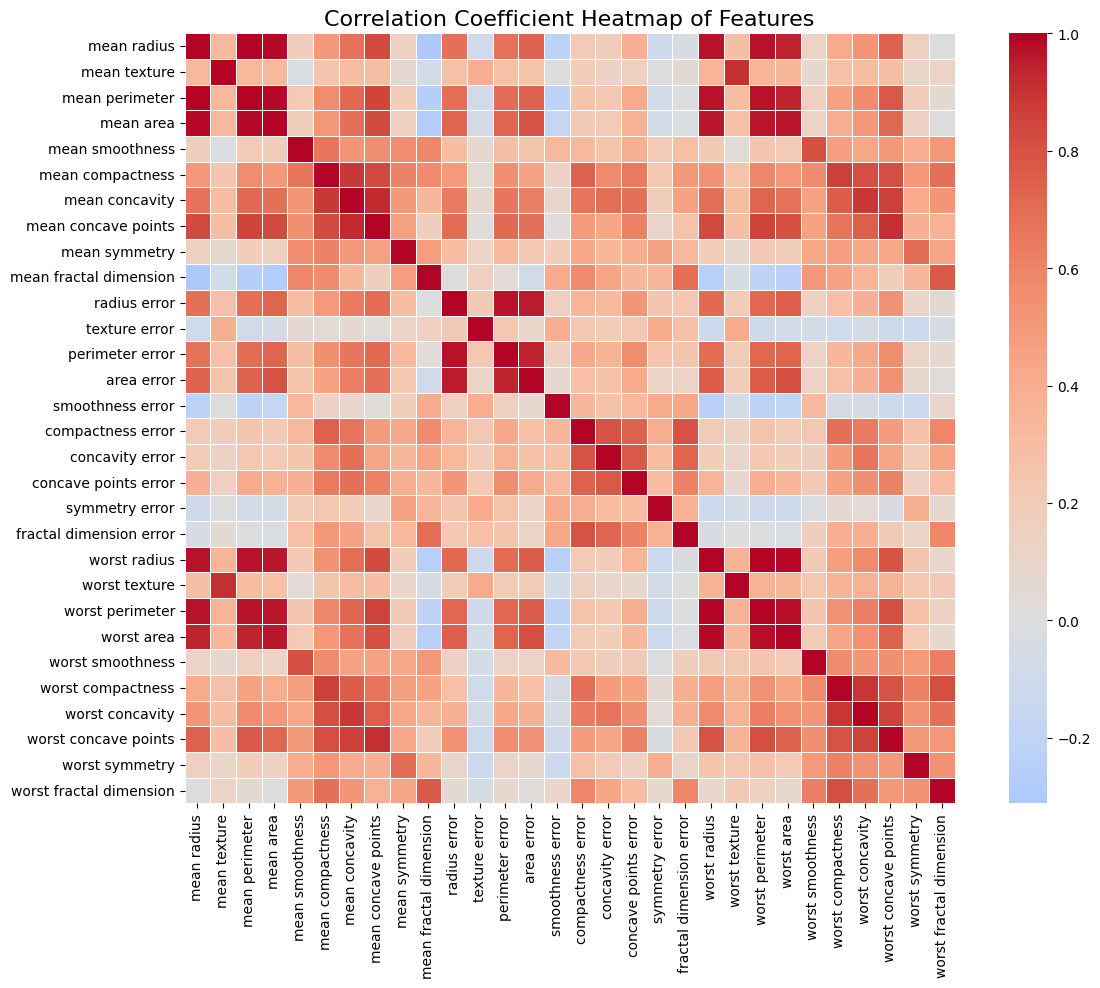

In [8]:
# Create a correlation coefficeint heatmap

# Compute correlation matrix (excluding target for now)
corr = df.drop(columns=['target']).corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, cbar=True,
            linewidths=0.5, square=True)

#corr() → computes Pearson’s correlation coefficient between each pair of numerical features.

#cmap="coolwarm" → shows strong positive correlations in red and strong negative in blue.

#center=0 → ensures 0 correlation is the midpoint of the color map.

#linewidths=0.5 → draws thin lines between cells for clarity.

plt.title("Correlation Coefficient Heatmap of Features", fontsize=16)
plt.show()


/var/folders/v4/6jx7p5p972g59nvc4vn2pzb40000gn/T/ipykernel_3073/182768475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="mean radius", data=df, palette="Set2")


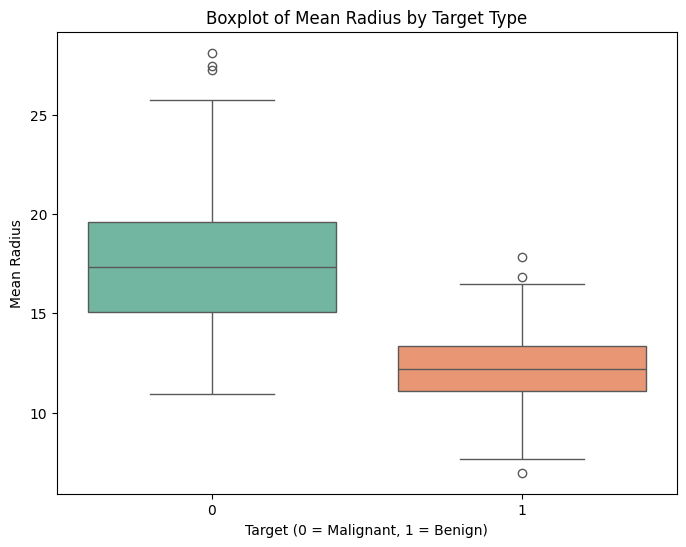

In [9]:
# Create a boxplot for mean radius by target type

plt.figure(figsize=(8,6))
sns.boxplot(x="target", y="mean radius", data=df, palette="Set2")

plt.title("Boxplot of Mean Radius by Target Type")
plt.xlabel("Target (0 = Malignant, 1 = Benign)")
plt.ylabel("Mean Radius")
plt.show()


With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [10]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#test_size=0.2 → 20% of the data goes to the test set.

#random_state=42 → ensures reproducibility (same split every time).

#stratify=y → keeps the class distribution (benign vs malignant) balanced in both training and test sets.

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Train set size: 455
Test set size: 114


In [18]:
# Build and train logistic regression model

As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

ROC AUC Score: 0.9953703703703703


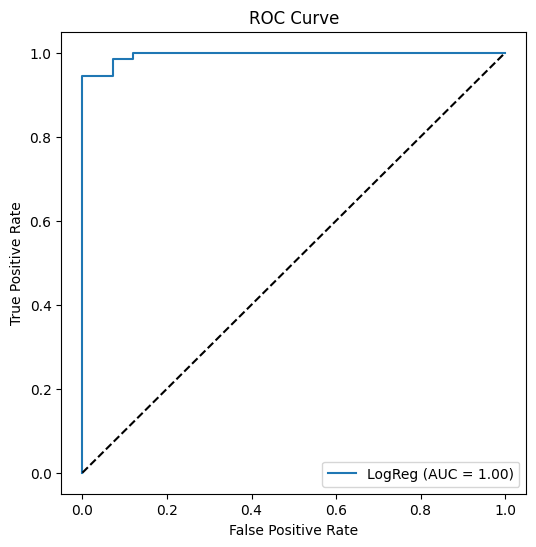

In [11]:
# Evaluate the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize model
log_reg = LogisticRegression(max_iter=10000, solver='lbfgs')

# Fit on training data
log_reg.fit(X_train, y_train)


# Probabilities for ROC curve
y_prob = log_reg.predict_proba(X_test)[:,1]

# Compute AUC
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()




In [12]:
# Generate a confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544
Precision: 0.9594594594594594
Recall: 0.9861111111111112
F1 Score: 0.9726027397260274

Confusion Matrix:
 [[39  3]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [13]:
# Generate a classification report
from sklearn.metrics import classification_report

# Predictions from your trained model
y_pred = log_reg.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Malignant (0)', 'Benign (1)'])
print(report)


               precision    recall  f1-score   support

Malignant (0)       0.97      0.93      0.95        42
   Benign (1)       0.96      0.99      0.97        72

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114



Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [14]:

# Extract coefficients

# Raw coefficients
coefficients = log_reg.coef_[0]
features = X.columns



In [15]:
# Normalize the coefficients by the standard deviation
# Standard deviation of training features
feature_stds = X_train.std(axis=0)

# Normalized coefficients
norm_coefficients = coefficients / feature_stds


In [16]:
# Sort feature names and coefficients by absolute value of coefficients
coef_df = pd.DataFrame({
    "Feature": features,
    "Normalized Coefficient": norm_coefficients
})

# Add absolute value for sorting
coef_df["Abs_Coefficient"] = coef_df["Normalized Coefficient"].abs()

# Sort by importance
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)
print(coef_df.head(10))  # top 10 most important features


                                   Feature  Normalized Coefficient  \
worst smoothness          worst smoothness              -13.971354   
mean smoothness            mean smoothness              -12.088019   
worst symmetry              worst symmetry              -12.046759   
mean symmetry                mean symmetry              -10.766436   
worst concave points  worst concave points               -8.168000   
smoothness error          smoothness error               -6.851541   
mean concave points    mean concave points               -6.286573   
worst concavity            worst concavity               -6.084372   
mean concavity              mean concavity               -5.520276   
concave points error  concave points error               -5.503238   

                      Abs_Coefficient  
worst smoothness            13.971354  
mean smoothness             12.088019  
worst symmetry              12.046759  
mean symmetry               10.766436  
worst concave points         

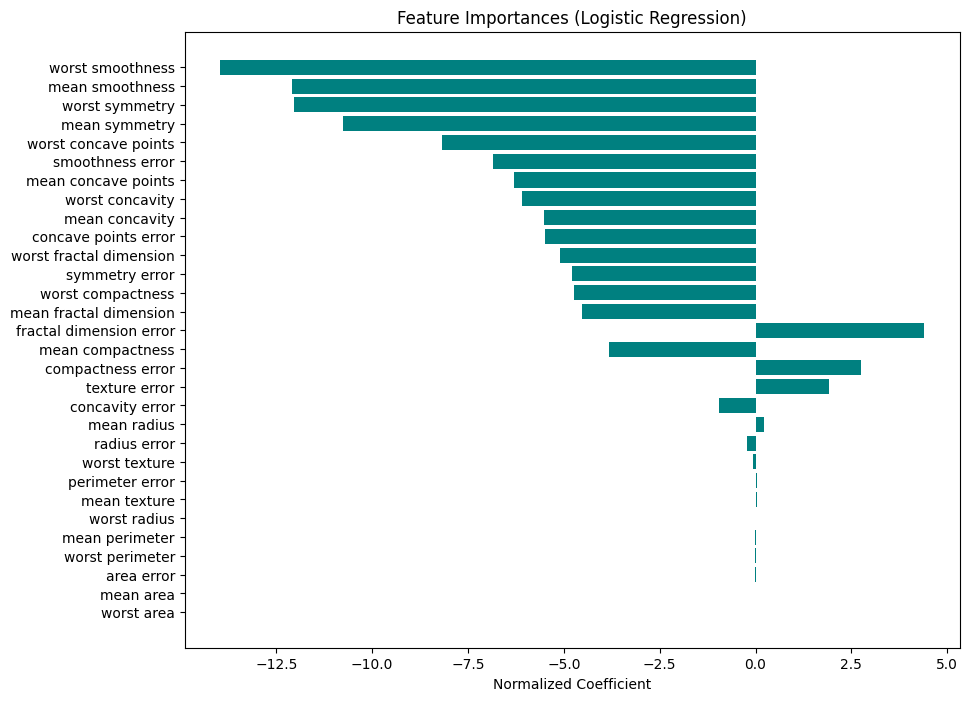

In [17]:
# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.barh(coef_df["Feature"], coef_df["Normalized Coefficient"], color="teal")
plt.gca().invert_yaxis()  # biggest on top
plt.xlabel("Normalized Coefficient")
plt.title("Feature Importances (Logistic Regression)")
plt.show()
